## Deep Feature Synthesis using Feature Tools 

Before going to apply Deep Feature Synthesis, lets explain some basic concepts:   
**The Process of Predictive Modeling**   
1. Data Collection and Cleaning
2. Data Transformation/Feature Engineering
3. Formulation of Predictive Model
4. Incorporate Analytics to Business Process
5. Monitor and Measure Model

**Feature Engineering** is a process in which raw data is transformed into features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data. Feature Engineering:   
- captures inherent structure of data   
- increases flexibility of model   
- increases accuracy of the model

**Entity Feature Matrix**   
Dataframe or table containing data of entities for instance users, transactions, products etc. It is basically the raw data to be transformed.   

**Deep Feature Synthesis (DFS)** is automated feature engineering method which generates new features.   

Entity Feature Matrix ---> **DFS** ----> Feaured Data   

In this notebook, we will demonstrate an example of using Deep Feature Synthesis using Featuretools Library with mock data available in featuretools library and create new features using Deep Feature Synthesis

## FeatureTools 
-Featuretools is a framework to perform automated feature engineering.   
-It excels at transforming temporal and relational datasets into feature matrices for machine learning.


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing featuretools
import featuretools as ft

## Loading Mock Data

In [5]:
data = ft.demo.load_mock_customer()
data

{'customers':    customer_id zip_code           join_date   birthday
 0            1    60091 2011-04-17 10:48:33 1994-07-18
 1            2    13244 2012-04-15 23:31:04 1986-08-18
 2            3    13244 2011-08-13 15:42:34 2003-11-21
 3            4    60091 2011-04-08 20:08:14 2006-08-15
 4            5    60091 2010-07-17 05:27:50 1984-07-28,
 'sessions':     session_id  customer_id   device       session_start
 0            1            2  desktop 2014-01-01 00:00:00
 1            2            5   mobile 2014-01-01 00:17:20
 2            3            4   mobile 2014-01-01 00:28:10
 3            4            1   mobile 2014-01-01 00:44:25
 4            5            4   mobile 2014-01-01 01:11:30
 5            6            1   tablet 2014-01-01 01:23:25
 6            7            3   tablet 2014-01-01 01:39:40
 7            8            4   tablet 2014-01-01 01:55:55
 8            9            1  desktop 2014-01-01 02:15:25
 9           10            2   tablet 2014-01-01 02:31:40


In [11]:
data.keys()

dict_keys(['customers', 'sessions', 'transactions', 'products'])

The data is a dictionary containing four dataframes:   
**Customers:** dataframe of customers   
**Sessions:** dataframe of sessions by customers   
**Transactions:** dataframe of transactions by customers   
**Products:** dataframe containing details of products   

Lets save the dataframes separately prior to using DFS.

In [12]:
df_customers = data['customers']
df_customers

,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [13]:
df_sessions = data['sessions']
df_sessions.head()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


In [14]:
df_tr = data['transactions']
df_tr.head()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


In [15]:
df_products = data['products']
df_products

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


In [16]:
df_tr.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
264,40,20,2014-01-01 04:46:00,5,53.22
19,370,2,2014-01-01 00:20:35,1,106.99
314,186,23,2014-01-01 05:40:10,5,128.26
290,380,21,2014-01-01 05:14:10,5,57.09
379,261,28,2014-01-01 06:50:35,1,133.71


### Defining Dataframes
First, we specify a dictionary with all the DataFrames in our dataset. 
The DataFrames are passed in with their index column and time index column if one exists for the DataFrame

In [17]:
dataframes = { 
    'customers': (df_customers, 'customer_id') ,
    'sessions': (df_sessions, 'session_id', 'session_start'),
    'transactions': (df_tr, 'transaction_id', 'transaction_time')
    }

### Defining Relationships
Second, we specify how the DataFrames are related. 
When two DataFrames have a one-to-many relationship, we call the “one” DataFrame, the “parent DataFrame”. 
A relationship between a parent and child is defined like this:   
(parent_dataframe, parent_column, child_dataframe, child_column)

In [18]:
relationships = [
    ('customers', 'customer_id', 'sessions', 'customer_id'),
    ('sessions', 'session_id', 'transactions', 'session_id')
]

### Run Deep Feature Synthesis
A minimal input to DFS is a dictionary of DataFrames, a list of relationships, and the name of the target DataFrame whose features we want to calculate. The ouput of DFS is a feature matrix and the corresponding list of feature definitions.



In [19]:
feature_matrix_customers, feature_defs = ft.dfs(
    dataframes = dataframes,
    relationships = relationships,
    target_dataframe_name = 'customers'
)

In [20]:
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


In [16]:
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


In [21]:
#One of the reasons DFS is so powerful is that it can create a feature matrix for any DataFrame in our EntitySet. 
#For example, if we wanted to build features for sessions

feature_matrix_sessions, features_defs = ft.dfs(
    dataframes=dataframes, relationships=relationships, target_dataframe_name="sessions"
)
feature_matrix_sessions.head(5)

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(birthday),customers.DAY(join_date),customers.MONTH(birthday),customers.MONTH(join_date),customers.WEEKDAY(birthday),customers.WEEKDAY(join_date),customers.YEAR(birthday),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


### Understanding Feature Output
In general, Featuretools references generated features through the feature name. In order to make features easier to understand, Featuretools offers two additional tools, featuretools.graph_feature() and featuretools.describe_feature(), to help explain what a feature is and the steps Featuretools took to generate it. Let’s look at this example feature:



<Feature: SUM(transactions.amount)>


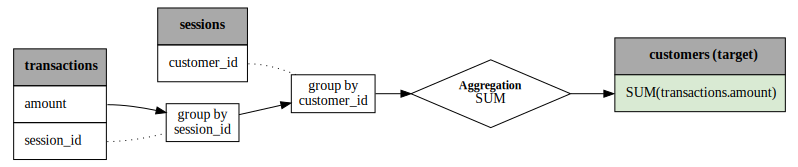

In [22]:
print(feature_defs[12])
ft.graph_feature(feature_defs[12])

In [23]:
ft.describe_feature(feature_defs[12])

'The sum of the "amount" of all instances of "transactions" for each "customer_id" in "customers".'

In [24]:
feature_matrix_customers.iloc[:,12]

customer_id
1    9025.62
2    7200.28
3    6236.62
4    8727.68
5    6349.66
Name: SUM(transactions.amount), dtype: float64

<Feature: SKEW(transactions.amount)> The skewness of the "amount" of all instances of "transactions" for each "customer_id" in "customers".


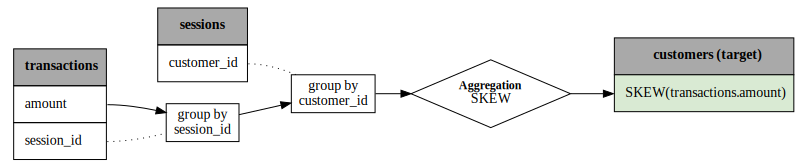

In [25]:
print(feature_defs[10], ft.describe_feature(feature_defs[10]))
ft.graph_feature(feature_defs[10])